# Turkey Time

### Initial imports

In [20]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

### Importing csv file into list

In [21]:
with open('w01-5.1-thanksgiving-2015-poll-data.csv', 'rU') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)
        
#for r in rows[0]:
#    print r[:50]

print 'Initial number of columns:', len(rows[0])
print 'Total number of respondents:', len(rows)-1
print'==========================================='

for r in rows[0][:2]+rows[0][-4:]:
    print r


Initial number of columns: 65
Total number of respondents: 1058
RespondentID
Do you celebrate Thanksgiving?
Age
What is your gender?
How much total combined money did all members of your HOUSEHOLD earn last year?
US Region


### Counting percentage of people who celebrate Thanksgiving

In [22]:
arr_answers=np.array(rows)[1:]

def count_in_column(col_number, answer):
    count_answer=0
    for i in range(arr_answers.shape[0]):
        if arr_answers[i,col_number]==answer:
            count_answer+=1
    return count_answer

print 'Percentage Yes:', round(count_in_column(1, 'Yes')/arr_answers.shape[0]*100, 2)
print 'Percentage No:', round(count_in_column(1, 'No')/arr_answers.shape[0]*100, 2)


Percentage Yes: 92.63
Percentage No: 7.37


### Check for duplicates in respondent ID column

In [23]:
all_answers_pd=pd.read_csv('w01-5.1-thanksgiving-2015-poll-data.csv')
print 'Number of duplicates:', all_answers_pd['RespondentID'].duplicated().sum()

answers_pd=all_answers_pd[['RespondentID',
                           'Do you celebrate Thanksgiving?',
                           'Age',
                           'What is your gender?',
                           'How much total combined money did all members of your HOUSEHOLD earn last year?', 
                           'US Region']]

print answers_pd[:10]

Number of duplicates: 0
   RespondentID Do you celebrate Thanksgiving?      Age What is your gender?  \
0    4337954960                            Yes  18 - 29                 Male   
1    4337951949                            Yes  18 - 29               Female   
2    4337935621                            Yes  18 - 29                 Male   
3    4337933040                            Yes  30 - 44                 Male   
4    4337931983                            Yes  30 - 44                 Male   
5    4337929779                            Yes  18 - 29                 Male   
6    4337924420                            Yes  18 - 29                 Male   
7    4337916002                            Yes  18 - 29                 Male   
8    4337914977                            Yes  30 - 44                 Male   
9    4337899817                            Yes  30 - 44                 Male   

  How much total combined money did all members of your HOUSEHOLD earn last year?  \
0         

Do you celebrate Thanksgiving?  No  Yes
Age                                    
18 - 29                         31  185
30 - 44                         24  235
45 - 59                         17  269
60+                              6  258


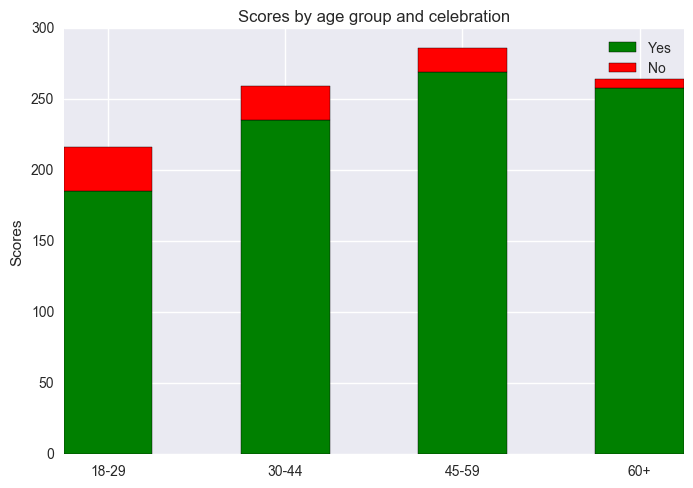

In [24]:
x = answers_pd.pivot_table(values='RespondentID', index='Age', columns='Do you celebrate Thanksgiving?', aggfunc='count')
print x

celeb_no = x['No']
celeb_yes = x['Yes']
ind = np.arange(4)    # the x locations for the groups
width = 0.50       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, celeb_yes, width, color='g')
p2 = plt.bar(ind, celeb_no, width, color='r', bottom=celeb_yes)

#find dimention for y
#print max(x['Yes'])+max(x['No'])

plt.ylabel('Scores')
plt.title('Scores by age group and celebration')
plt.xticks(ind + width/2., ('18-29', '30-44', '45-59', '60+'))
plt.yticks(np.arange(0, 301, 50))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.show()
